In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score
from sklearn.metrics import pairwise_distances_argmin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
class kmeans_scratch:
    def __init__(self):
        self.k=5
        self.dimen_Reduction=4
    def read_data(self,mypath):
        #mypath='./Datasets/Question-6/dataset/'
        dirs = os.listdir( mypath )
        data=[]
        for i in dirs:
            with open(mypath + i,'rb') as f:
                a = f.read().decode('unicode_escape')
                a = "".join(i for i in a if ord(i) <128)
                data.append(a)
        data = np.array(data)
        return data
    def vectorize_data(self,data):
        tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',max_features = 20000)
        tf_idf = tf_idf_vectorizor.fit_transform(data)
        tf_idf_array = tf_idf.toarray()
        return tf_idf_array
    def reduce_dimension(self,data):
        pca = PCA(n_components = self.dimen_Reduction)
        reduce_data = pca.fit_transform(data)
        return reduce_data
    def init_centres(self,tf_idf_array,rseed=2):
        rng = np.random.RandomState(rseed)
        i = rng.permutation(tf_idf_array.shape[0])[:self.k]
        centers = tf_idf_array[i]
        return centers
    def e_step(self,data,centroids):
        labels = pairwise_distances_argmin(data, centroids)
        return labels
    def m_step(self,data,labels,centroids):
        new_centers = np.array([data[labels == i].mean(0) for i in range(self.k)])
        return new_centers
    def em_steps(self,data,centroids,iterations):
        for i in range(iterations):
            labels=self.e_step(data,centroids)
            centroids=self.m_step(data,labels,centroids)
        return centroids,labels
    def get_labels(self,mypath):
        y=[]
        dirs = os.listdir( mypath )
        for i in dirs:
            y.append(int(i.split('_')[1].split('.')[0]))
        return y
    

# Using inbuilt function

In [3]:
mypath='./Datasets/Question-6/dataset/'
km_inbuilt=kmeans_scratch()
km_inbuilt_data=km_inbuilt.read_data(mypath)
km_inbuilt_tf_idf_array=km_inbuilt.vectorize_data(km_inbuilt_data)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=51).fit(km_inbuilt_tf_idf_array)
centers_inbuilt=kmeans.cluster_centers_
y_inbuilt=kmeans.labels_
homogeneity_score(km_inbuilt.get_labels(mypath),y_inbuilt)

0.7521518151895453

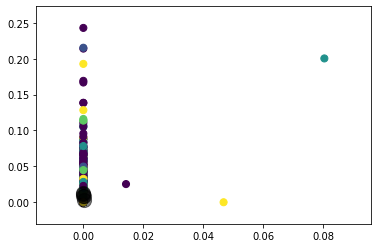

In [4]:
plt.scatter(km_inbuilt_tf_idf_array[:, 0], km_inbuilt_tf_idf_array[:, 1], c=y_inbuilt, s=50, cmap='viridis')
plt.scatter(centers_inbuilt[:, 0], centers_inbuilt[:, 1], c='black', s=200, alpha=0.5)

# With different iterations

In [4]:
mypath='./Datasets/Question-6/dataset/'
homo_score_reduce=[]
km_scr=kmeans_scratch()
p_scr=km_scr.read_data(mypath) #read data from files
p_tf_idf_array_scr=km_scr.vectorize_data(p_scr) #vectorize data 
p_reduce_dim_scr=km_scr.reduce_dimension(p_tf_idf_array_scr) #reduce dimension using PCA dimensionality reduction
init_centers_scr=km_scr.init_centres(p_reduce_dim_scr,54) #initialize cluster centres randomly
iterations=[5,10,15,20,25,30,35,40,45,50]
for i in range(len(iterations)):
    centroids_scr,labels_scr=km_scr.em_steps(p_reduce_dim_scr,init_centers_scr,iterations[i])
    homo_score_reduce.append(homogeneity_score(km_scr.get_labels(mypath),labels_scr))
    print("Homogenity score for {} iterations is {}".format(iterations[i],homogeneity_score(km_scr.get_labels(mypath),labels_scr)))


Homogenity score for 5 iterations is 0.6133897058950363
Homogenity score for 10 iterations is 0.7311199439769467
Homogenity score for 15 iterations is 0.6831066552925897
Homogenity score for 20 iterations is 0.6479475725919897
Homogenity score for 25 iterations is 0.640231055021798
Homogenity score for 30 iterations is 0.6382174133834501
Homogenity score for 35 iterations is 0.6382174133834501
Homogenity score for 40 iterations is 0.6382174133834501
Homogenity score for 45 iterations is 0.6382174133834501
Homogenity score for 50 iterations is 0.6382174133834501


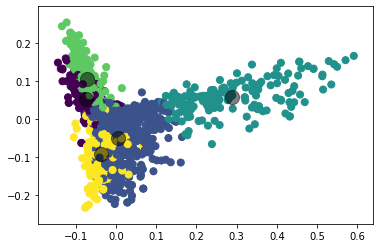

In [5]:
plt.scatter(p_reduce_dim_scr[:, 0], p_reduce_dim_scr[:, 1], c=labels_scr, s=50, cmap='viridis')
plt.scatter(centroids_scr[:, 0], centroids_scr[:, 1], c='black', s=200, alpha=0.5)

Text(0, 0.5, 'Homogenity score')

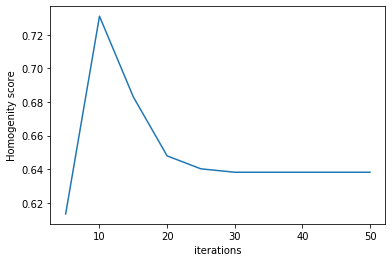

In [21]:

plt.plot(iterations, homo_score_reduce)
plt.xlabel("iterations")
plt.ylabel("Homogenity score")


# Without dimensionality reduction

In [28]:
mypath='./Datasets/Question-6/dataset/'
homo_score_1=[]
km=kmeans_scratch()
p=km.read_data(mypath) 
p_tf_idf_array=km.vectorize_data(p) 
init_centers=km.init_centres(p_tf_idf_array) 
iterations_1=[1,2,5,7,10]
for i in range(len(iterations_1)):
    centroids,labels=km.em_steps(p_tf_idf_array,init_centers,iterations_1[i])
    homo_score_1.append(homogeneity_score(km.get_labels(mypath),labels))
    print("Homogenity score for {} iterations is {}".format(iterations_1[i],homogeneity_score(km.get_labels(mypath),labels)))



Homogenity score for 1 iterations is 0.2650215988452928
Homogenity score for 2 iterations is 0.5410597561420971
Homogenity score for 5 iterations is 0.7459474653608407
Homogenity score for 7 iterations is 0.7284616563320141
Homogenity score for 10 iterations is 0.7197868679504388


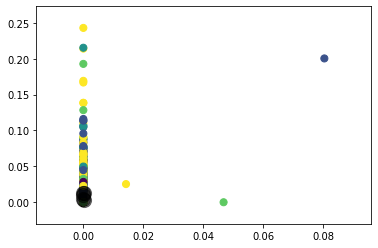

In [29]:
plt.scatter(p_tf_idf_array[:, 0], p_tf_idf_array[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)

Text(0, 0.5, 'Homogenity score')

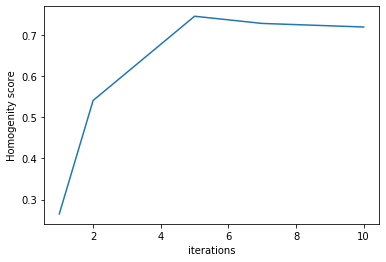

In [30]:
plt.plot(iterations_1, homo_score_1)
plt.xlabel("iterations")
plt.ylabel("Homogenity score")

# Lets converge more

0.2650215988452928
0.5410597561420971
0.670242907515182
0.7200098921566719
0.7459474653608407
0.7341625518643999
0.7284616563320141
0.7256373106768622
0.7231675585855813
0.7197868679504388
0.7186484462536196
0.7186484462536196


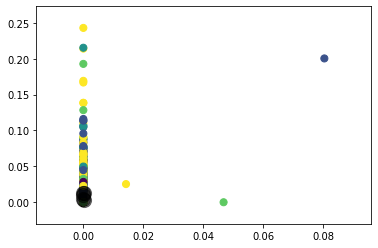

In [37]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import homogeneity_score
homo_score_2=[]
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        print(homogeneity_score(km_1.get_labels(mypath),labels))
        homo_score_2.append(homogeneity_score(km_1.get_labels(mypath),labels))
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels


mypath='./Datasets/Question-6/dataset/'
km_1=kmeans_scratch()
p=km_1.read_data(mypath)
tf_idf_array=km_1.vectorize_data(p)

centers, labels = find_clusters(tf_idf_array, 5)
plt.scatter(tf_idf_array[:, 0], tf_idf_array[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Text(0, 0.5, 'Homogenity score')

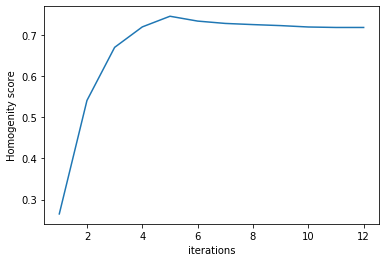

In [41]:
plt.plot(list(range(1,len(homo_score_2)+1)), homo_score_2)
plt.xlabel("iterations")
plt.ylabel("Homogenity score")